# Importing Dependencies

In [1]:
# Make sure all outputs are displayed and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import all necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

# Load dataset

In [2]:
# Read dataset in pandas dataframe
xl = pd.ExcelFile("new_AirQualityUCI_changed.xlsx")
#xl.sheet_names
df = xl.parse("AirQualityUCI")
df.head()
print(df.shape)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1080,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,1140,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,1200,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,1260,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1320,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


(9357, 14)


# Plug out features that have too many missing value

In [3]:
# Check for the missing values
# According to the dataset website, features that have value = -200 is marked as a missing value

print ((df[['Time', 'CO(GT)','PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']] == -200).sum())

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [4]:
# Make PT08.S1(CO) as the target feature
df['Target'] = df['PT08.S1(CO)']

# Drop target columns
df.drop(['PT08.S1(CO)'], axis=1, inplace=True)

# Drop bad features, NMHC(GT) has more than 8k of missing value
df.drop(['NMHC(GT)'], axis=1, inplace=True)
df.head()

,Time,CO(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Target
0,1080,2.6,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,1360.00
1,1140,2.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,1292.25
2,1200,2.2,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,1402.00
3,1260,2.2,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,1375.50
4,1320,1.6,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,1272.25


In [5]:
# Split data manually
y = df.Target.values
feature_cols = [i for i in list(df.columns) if i != 'Target']
x = df.ix[:,feature_cols].as_matrix()

x_train, x_test, y_train, y_test = \
    model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape
x_test.shape
y_train.shape
y_test.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


(7485, 12)

(1872, 12)

(7485,)

(1872,)

# Cross-validation

In [6]:
c_regr = linear_model.LinearRegression()

scores = model_selection.cross_val_score(c_regr, x, y, scoring='neg_mean_squared_error', cv=5)

print (scores)

scores2 = model_selection.cross_val_score(c_regr, x, y, scoring='r2', cv=5)

print (scores2)
print("Max R2 score: %.8f" % np.amax(scores2))

[-26815.66890206 -13552.99411731  -4472.23654668  -4543.15653207
  -8228.02389605]
[ 0.70350609  0.76208437  0.95674566  0.97328018  0.92788725]
Max R2 score: 0.97328018


# Fitting the model

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
      
# Explained variance score: 1 is perfect prediction
print('Variance R2 score: %.8f' % r2_score(y_test, y_pred))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Mean squared error: 5610.23741217
Variance R2 score: 0.94835187


# Plotting the result

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

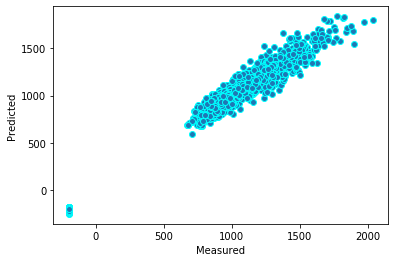

In [8]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 1, 1))
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

#plt.xticks(())
#plt.yticks(())

plt.show()